In [2]:
import librosa
import numpy 
import matplotlib.pyplot as plt
import IPython.display as ipd
audio_file = '../Eng_audio/Eng01.wav'
y, sr = librosa.load(audio_file)
sample_length = int(round(0.025*sr))
sample_start = int(round(0.01*sr))
print(sample_length)
ipd.Audio(audio_file)



551


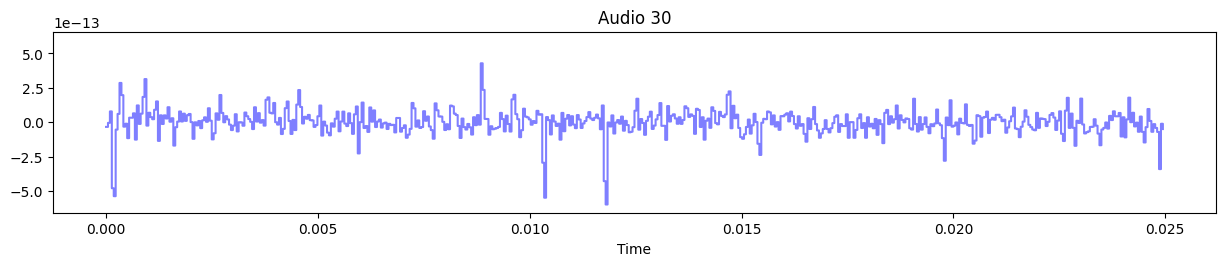

In [3]:

plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
librosa.display.waveshow(y=y[:sample_length], sr=sr,color="blue",alpha = 0.5)
plt.title("Audio 30")
plt.show()

In [4]:
FRAME_SIZE = int(round(0.025*sr))
HOP_LENGTH = int(round(0.01*sr))
def conditions(a,threshold):
    if a < 0 :
        return a>threshold*(-1)
    else :
        return a<threshold
    
def amplitude_envelop(signal,frame_size,hop_length):
    amplitude_envelop_threshold = []
    #tính biên bộ lớn nhất trong mỗi frame
    for i in range(0,len(signal),hop_length):
        current_frame_amplitude_envelop = max(signal[i:i+frame_size])
        amplitude_envelop_threshold.append(current_frame_amplitude_envelop*0.5)
    result = []
    l=0
    for i in range(0,len(signal),hop_length):
        count = len([a for a in signal[i:i+FRAME_SIZE] if conditions(a,amplitude_envelop_threshold[l])])
        l= l+1
        result.append(count/FRAME_SIZE)    
    return numpy.array(amplitude_envelop_threshold)

[2.13856710e-13 2.27373675e-13 1.53596047e-05 3.36384401e-05
 3.28700803e-03 3.92060168e-03 5.04352897e-03 5.04352897e-03
 2.85548670e-03 4.31359606e-03 4.31359606e-03 4.31359606e-03
 5.03867632e-03 5.03867632e-03 3.33733391e-03 2.68540561e-01
 2.68540561e-01 2.61925042e-01 2.61925042e-01 2.52972066e-01
 2.60476232e-01 2.60476232e-01 1.29738346e-01 1.11357272e-01
 1.11380614e-01 1.19651064e-01 1.34201020e-01 1.34201020e-01
 1.34201020e-01 1.22892939e-01 1.18615583e-01 8.78285170e-02
 2.29848519e-01 2.29848519e-01 2.26983547e-01 2.67336488e-01
 2.67336488e-01 2.67336488e-01 2.59432107e-01 2.26076111e-01
 1.36367261e-01 1.59586892e-01 1.83763310e-01 1.87130034e-01
 2.49656200e-01 2.63664007e-01 2.63664007e-01 2.65763670e-01
 2.65763670e-01 1.99093521e-01 1.86339751e-01 1.86339751e-01
 8.97371769e-02 5.94853647e-02 1.38817191e-01 2.46993765e-01
 2.46993765e-01 2.46993765e-01 1.79888517e-01 1.66612357e-01
 1.73231527e-01 2.31368601e-01 2.57747084e-01 2.57747084e-01
 2.57258922e-01 2.642458

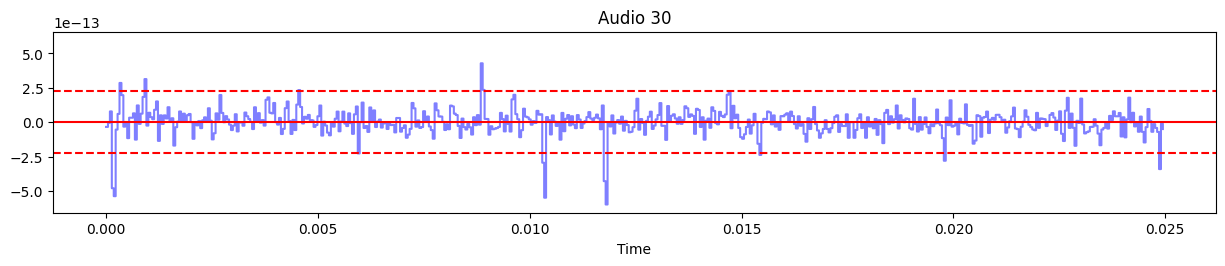

In [5]:
ae = amplitude_envelop(y,FRAME_SIZE,HOP_LENGTH)
print(ae)
plt.figure(figsize=(15,8))
plt.subplot(3,1,1)
librosa.display.waveshow(y=y[:sample_length], sr=sr,color="blue",alpha = 0.5)
plt.title("Audio 30")
plt.axhline(y=ae[1], color='r', linestyle='--', label='Đường thẳng')
plt.axhline(y=-ae[1], color='r', linestyle='--', label='Đường thẳng')
plt.axhline(y=0,color="r")
plt.show()

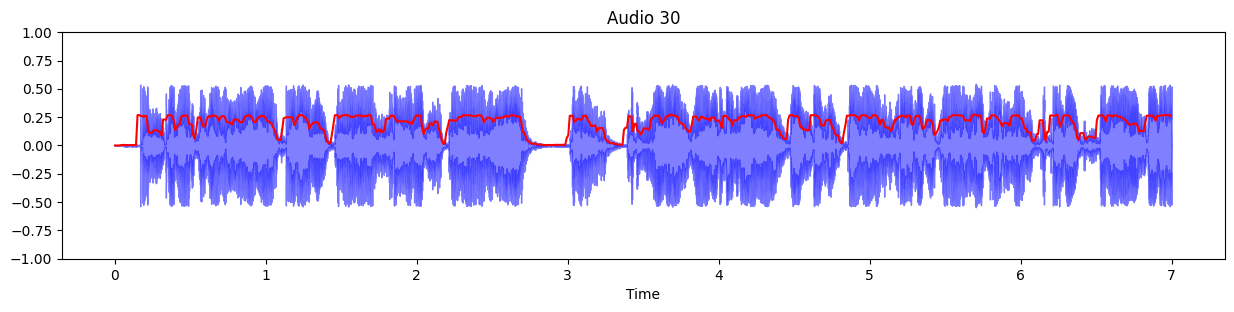

In [6]:
frames = range(0,len(ae))
t = librosa.frames_to_time(frames,hop_length=HOP_LENGTH)
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
librosa.display.waveshow(y, sr=sr,color="blue",alpha=0.5)
plt.plot(t,ae,color="r")
plt.title("Audio 30")
plt.ylim(-1,1)
plt.show()


In [7]:
def rms(signal,frame_length,hop_length):
    rms = []
    for i in range(0, len(signal),hop_length):
        rms_current_frame = numpy.sqrt(numpy.sum(signal[i:i+frame_length]**2)/ frame_length)
        rms.append(rms_current_frame)
    return numpy.array(rms)


In [8]:
rms = rms(y,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)

orms = librosa.feature.rms(y=y,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
print(rms.mean())
print(orms.mean())


0.1588390461729133
0.15844442


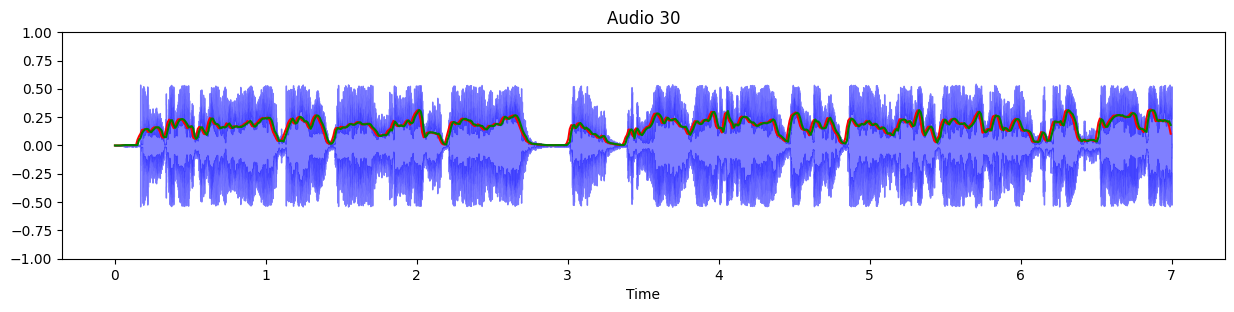

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
librosa.display.waveshow(y, sr=sr,color="blue",alpha=0.5)
plt.plot(t,rms,color="r")
plt.plot(t,orms,color="green")
plt.title("Audio 30")
plt.ylim(-1,1)
plt.show()


In [10]:
zero_crossing  = librosa.feature.zero_crossing_rate(y=y,frame_length=FRAME_SIZE,hop_length=HOP_LENGTH)[0]
print(zero_crossing.mean())

0.12874545633166323


(0.0, 551.0)

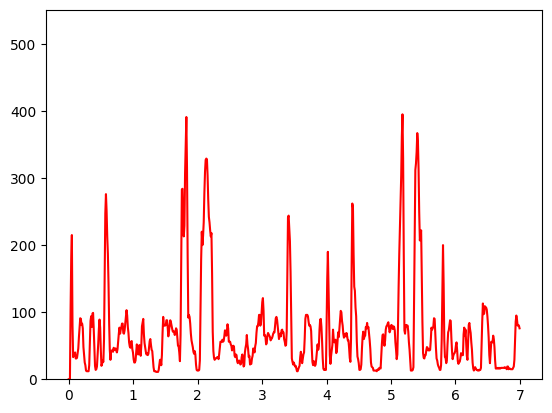

In [11]:
plt.plot(t,zero_crossing*FRAME_SIZE,color="r")
plt.ylim(0,FRAME_SIZE)

In [12]:
bw = librosa.feature.spectral_bandwidth(y=y,n_fft= FRAME_SIZE, hop_length= HOP_LENGTH)
print((numpy.array(bw[0]).mean()))

1993.610458267155


In [13]:

ct = librosa.feature.spectral_centroid(y=y,n_fft= FRAME_SIZE, hop_length= HOP_LENGTH)
print((numpy.array(ct[0]).mean()))

2305.1637780150386


In [14]:
mfccs = librosa.feature.mfcc(y=y,hop_length=HOP_LENGTH,n_fft=FRAME_SIZE,n_mfcc=12)
features = []
# print(mfccs)
for i in range(0,len(mfccs)):
    meanFeature = numpy.array(mfccs[i]).mean()
    features.append(meanFeature)
print(features)



[-300.7554, 80.31185, -28.719278, 21.218578, -4.0253034, -15.026562, -19.394957, -23.793428, -11.578871, -18.682844, -24.381683, -1.4130595]


In [ ]:
pitch = librosa.feature.